# Plotting Accumulated Rewards

In [20]:
import pandas as pd
import numpy as np
import glob
import re
from pandas import DataFrame

In [236]:
## First setting
list_of_files = glob.glob('./social/*3-12*.txt')   # create the list of file
dataset = DataFrame({"Step":range(400)})
count = 1;
for file_name in list_of_files:
    print(file_name)
    data = pd.read_csv(file_name,header=None)
    data = data.replace(" ", "")
    d = []
    for i in data.iloc[:,3]:
        i = re.sub(r'[ a-z]+','',i)
        d.append(i)
    dataset[str(count)] = d#.astype("float")
    #print([:5])
    count = count+1

./social/social_3-12_eli.txt
./social/social_3-12_apoorva.txt
./social/social_3-12_xiang.txt
./social/social_3-12_cao.txt
./social/social_3-12_xianhao.txt
./social/social_3-12_lyu.txt
./social/social_3-12_tim.txt
./social/social_3-12_snehal.txt
./social/social_3-12_lu.txt
./social/social_3-12_marianne.txt
./social/social_3-12_sanne.txt
./social/social_3-12_paul.txt
./social/social_3-12_han.txt
./social/social_3-12_simone.txt
./social/social_3-12_Ziyu.txt
./social/social_3-12_teresa.txt
./social/social_3-12_chitra.txt
./social/social_3-12_fanis.txt
./social/social_3-12_liu.txt
./social/social_3-12_shiyu.txt


In [237]:
print(dataset.head())

   Step    1    2    3    4    5    6    7    8    9 ...    11   12   13   14  \
0     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1     1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2     2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3     3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4     4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    15   16   17   18   19   20  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 21 columns]


In [238]:
reward = dataset.iloc[:,1:-1].values.astype('float')
print(reward)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [116.  53.  56. ...  29.  33.  25.]
 [116.  53.  56. ...  29.  33.  25.]
 [116.  53.  56. ...  30.  33.  25.]]


In [239]:
avg_reward = np.mean(reward,axis=1)
print(avg_reward.shape)
print(avg_reward)

(400,)
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.52631579  0.52631579  0.52631579  0.63157895  0.63157895
  0.63157895  1.15789474  1.15789474  1.68421053  1.68421053  1.68421053
  1.68421053  1.68421053  1.73684211  1.73684211  1.73684211  2.26315789
  2.26315789  2.26315789  2.26315789  2.26315789  2.26315789  2.26315789
  2.26315789  2.26315789  2.26315789  2.78947368  2.78947368  2.78947368
  2.78947368  2.78947368  2.84210526  3.36842105  3.36842105  3.42105263
  3.42105263  3.94736842  4.          4.52631579  4.52631579  5.05263158
  5.05263158  5.57894737  5.57894737  5.57894737  5.63157895  5.68421053
  5.68421053  5.68421053  5.78947368  5.84210526  5.84210526  5.84210526
  5.84210526  6.36842105  6.42105263  6.42105263  6.42105263  6.42105263
  6.42105263  6.42105263  6.42105263  6.94736842  6.94736842  7.
  7.          7.          7.          7.          7.05263158  7.0526

## Plotting rewards

In [21]:
## First setting
setting = '3-12'
def extract_reward_beta_social(setting):
    
    list_of_files = glob.glob('./social/*'+setting+'*.txt')   # create the list of file
    dataset = DataFrame({"Step":range(400)})
    dataset_beta = DataFrame({"Step":range(400)})
    count = 1;
    name_list = []
    for file_name in list_of_files:
        #print(file_name)
        #name = re.search(r'[./a-zA-Z0-9]_[a-z](.+?).txt',file_name)
        #name = re.search( r'(.*) are (.*?) .*', line,
        sub_name = './social/social_'+setting+'_'
        start = file_name.find(sub_name) + len(sub_name)
        end = file_name.find('.txt',start)
        name = file_name[start:end]
        name = name.replace('_','')
        #print(name)
        data = pd.read_csv(file_name,header=None)
        data = data.replace(" ", "")
        d = []
        for i in data.iloc[:,3]:
            i = re.sub(r'[ a-z]+','',i)
            d.append(i)
        dataset[name] = d#.astype("float")
        dataset_beta[name]=data.iloc[:,2]
        #print(DataFrame.max(dataset_beta))
    
    return dataset,dataset_beta


def nonsocial_avg_reward():
    nonsocial_file = 'log_nonsocial29.txt'
    data = pd.read_csv(nonsocial_file,header=None)
    reward = data.iloc[:,1].values.astype('float')
    beta = data.iloc[:,2].values.astype('float')
    print(reward.shape)
    #print(reward)
    return(reward,beta)

In [22]:
setting1 = '3-12'
reward_df_s1, beta_df_s1 = extract_reward_beta_social(setting1)

setting2 = '12-3'
reward_df_s2,beta_df_s2 = extract_reward_beta_social(setting2)

cols = reward_df_s1.columns
print(cols)
reward_df_s2 = reward_df_s2[list(cols)]

reward_s1 = reward_df_s1.iloc[:,1:-1].values.astype('float')
beta_s1 = beta_df_s1.iloc[:,1:-1].values.astype('float')

reward_s2 = reward_df_s2.iloc[:,1:-1].values.astype('float')
beta_s2 = beta_df_s2.iloc[:,1:-1].values.astype('float')
    
idx_max = np.argmax(reward_df_s2.iloc[-1,1:-1].values.astype('float'))
idx_min = np.argmin(reward_df_s2.iloc[-1,1:-1].values.astype('float'))
    
beta_max = beta_df_s2.iloc[:,idx_max+1].values.astype('float')
beta_min = beta_df_s2.iloc[:,idx_min+1].values.astype('float')

Index(['Step', 'eli', 'apoorva', 'xiang', 'cao', 'xianhao', 'lyu', 'tim',
       'snehal', 'lu', 'marianne', 'sanne', 'paul', 'han', 'simone', 'Ziyu',
       'teresa', 'chitra', 'fanis', 'liu', 'shiyu'],
      dtype='object')


In [41]:
#avage reward and beta computing

avg_reward_s1 = np.mean(reward_s1,axis=1)
avg_beta_s1 = np.mean(beta_s1,axis=1)

avg_reward_s2 = np.mean(reward_s2,axis=1)
avg_beta_s2 = np.mean(beta_s2,axis=1)

#nonsocial
avg_reward_nonsocial,avg_beta_nonsocial = nonsocial_avg_reward()

(400,)


In [24]:
print(reward_df_s1.iloc[-4:-1,:])
print(reward_df_s2.iloc[-4:-1,:])

     Step    eli apoorva xiang   cao xianhao  lyu   tim snehal     lu  ...    \
396   396  116.0    53.0  56.0  20.0    26.0  8.0  25.0  270.0  142.0  ...     
397   397  116.0    53.0  56.0  20.0    26.0  8.0  25.0  280.0  142.0  ...     
398   398  116.0    53.0  56.0  20.0    26.0  8.0  25.0  280.0  142.0  ...     

     sanne   paul   han simone   Ziyu teresa chitra fanis   liu  shiyu  
396  240.0  102.0  47.0   18.0  105.0   41.0   29.0  33.0  25.0  130.0  
397  240.0  102.0  47.0   18.0  105.0   41.0   29.0  33.0  25.0  130.0  
398  240.0  102.0  47.0   18.0  105.0   41.0   29.0  33.0  25.0  130.0  

[3 rows x 21 columns]
     Step   eli apoorva xiang   cao xianhao   lyu   tim snehal    lu  ...   \
396   396  71.0   103.0  55.0  20.0    19.0  60.0  30.0   15.0  17.0  ...    
397   397  71.0   103.0  55.0  20.0    19.0  60.0  30.0   15.0  18.0  ...    
398   398  71.0   103.0  55.0  20.0    19.0  60.0  30.0   15.0  18.0  ...    

     sanne   paul   han simone   Ziyu teresa chitra

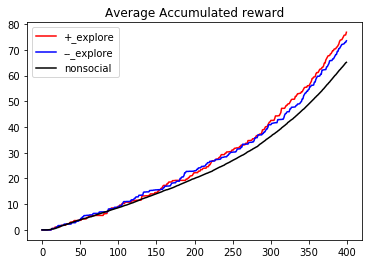

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(range(400),avg_reward_s2,label='+_explore',color='red')
plt.plot(range(400), avg_reward_s1,label='--_explore',color='blue')
plt.plot(range(400),avg_reward_nonsocial,label='nonsocial',color='black')
#plt.axis([0, 6, 0, 20])
plt.title("Average Accumulated reward")
plt.legend()
plt.show()

## Plotting beta

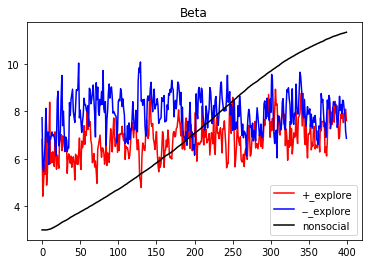

In [50]:
import matplotlib.pyplot as plt

plt.plot(range(400),avg_beta_s2,label='+_explore',color='red')
plt.plot(range(400), avg_beta_s1,label='--_explore',color='blue')
plt.plot(range(400),avg_beta_nonsocial,label='nonsocial',color='black')

plt.title("Beta")
#plt.axis([0, 6, 0, 20])
plt.legend()
plt.show()

[ 116.   53.   56.   20.   26.    8.   26.  280.  142.   19.  250.  102.
   47.   18.  105.   41.   30.   33.   25.]
[  71.  103.   55.   20.   19.   60.   30.   15.   18.   38.  272.  152.
   27.   19.  231.   28.  221.   52.   29.]


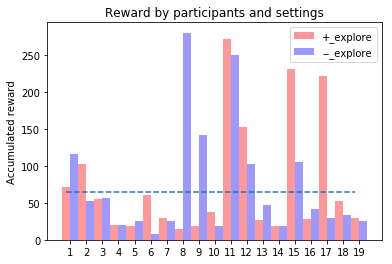

In [27]:
person_reward_s1 = reward_df_s1.iloc[-1:,1:-1].values[0].astype('float')
print(person_reward_s1)
person_reward_s2 = reward_df_s2.iloc[-1:,1:-1].values[0].astype('float')
print(person_reward_s2)

fig, ax = plt.subplots()

bar_width = 0.5
opacity = 0.4
error_config = {'ecolor': '0.5'}
index = np.arange(len(person_reward_s1))


rects2 = ax.bar(index,person_reward_s2, bar_width,
                alpha=opacity, color='r',error_kw=error_config,label='+_explore')
rects1 = ax.bar(index+bar_width,person_reward_s1, bar_width,
                alpha=opacity, color='b',error_kw=error_config,label='--_explore')

ax.plot(index,[avg_reward_nonsocial[-1]]*len(index),linestyle='--')

ax.set_ylabel('Accumulated reward')
ax.set_title('Reward by participants and settings')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,len(cols)))
# ax.set_xticklabels(cols)
#ax.set_yticklabels(0,int(max_r))
ax.legend()


## ANOVA

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:

df_r_b_s1 = DataFrame({'step':range(400),'reward':avg_reward_s1,'beta':avg_beta_s1})
df_r_b_s2 = DataFrame({'step':range(400),'reward':avg_reward_s2,'beta':avg_beta_s2})
print(df_r_b_s1.iloc[-4:,:])

df_r_b_normal = DataFrame({'step':range(400),'reward':avg_reward_nonsocial,'beta':avg_beta_nonsocial})
# reward_df_s1['avg'] = avg_reward_s1
# reward_df_s2['avg'] = avg_reward_s2

def show_anova_t2(data):
    lm = ols('reward~beta+step',data=data).fit()
    table = sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame
    print(table)
    return lm

lm_s1 = show_anova_t2(df_r_b_s1)
lm_s2 = show_anova_t2(df_r_b_s2)
lm_nonsocial = show_anova_t2(df_r_b_normal)


         beta     reward  step
396  8.096079  72.368421   396
397  7.911440  72.894737   397
398  7.145534  72.894737   398
399  6.860218  73.526316   399
                 sum_sq     df            F         PR(>F)
beta          95.122545    1.0     4.915049   2.718961e-02
step      153643.016246    1.0  7938.842665  1.459658e-264
Residual    7683.270727  397.0          NaN            NaN
                 sum_sq     df            F         PR(>F)
beta           2.584356    1.0     0.105691   7.452759e-01
step      130046.277496    1.0  5318.413852  5.055608e-232
Residual    9707.475500  397.0          NaN            NaN
               sum_sq     df          F        PR(>F)
beta       111.956369    1.0   7.630455  6.005825e-03
step      1062.778085    1.0  72.434296  3.586138e-16
Residual  5824.905124  397.0        NaN           NaN


In [47]:
def show_anova_t1(lm_s1,lm_s2,lm_nonsocial):
    table = sm.stats.anova_lm(lm_s1,lm_s2,lm_nonsocial, typ=1) # Type 2 ANOVA DataFrame
    print(table)
  
show_anova_t1(lm_nonsocial,lm_s1,lm_s2)

   df_resid          ssr  df_diff      ss_diff    F  Pr(>F)
0     397.0  5824.905124      0.0          NaN  NaN     NaN
1     397.0  7683.270727     -0.0 -1858.365603  inf     NaN
2     397.0  9707.475500     -0.0 -2024.204773  inf     NaN


/Users/lizy/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

/Users/lizy/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

/Users/lizy/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning:

invalid value encountered in less_equal

